# Universidad de Buenos Aires
# Deep Learning - Examen
# Noviembre 2022



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 18 de diciembre a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público” (tanto con los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link).


## Ejercicio 1



Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$

(a) Aplicar gradiente e igualar a zero para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

(b) Aplicar SGD para encontrar la ubicación del máximo de manera numérica.

## Ejercicio 2



En las siguientes imágenes, se presenta la traslación de un objeto en la capa de entrada de una CNN (el 2 de las imágenes inferiores) y las neuronas que se activan a la salida de dicha CNN para 2 tipos de propiedadedes de las CNN: *Invarianza al desplazamiento (translational invariance)* y *equivariancia al desplazamiento (translational equivariance)*.


![a](https://drive.google.com/uc?export=view&id=1buWr91SCZcx4Zx55VLpAf1mCxqVgHgci)

Imagen 1




![b](https://drive.google.com/uc?export=view&id=1FqUKjutcRL-1Vay0HYY-1tXlISCZFH02)

Imagen 2


Preguntas:
* a) ¿Qué imagen se corresponde con cuál propiedad? 
* b) ¿Cuál/cuáles de cada capa elemental de una CNN (convolución - activación - pooling) aporta cada propiedad?





## Ejercicio 3





Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$ 
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$ 



## Ejercicio 4 




Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Compare el score de cada modelo y comente lo necesario.



In [145]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt
from torchsummary import summary
import math
from tqdm import tqdm
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns


In [146]:
df = pd.read_csv('data/dataset_black_sales.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


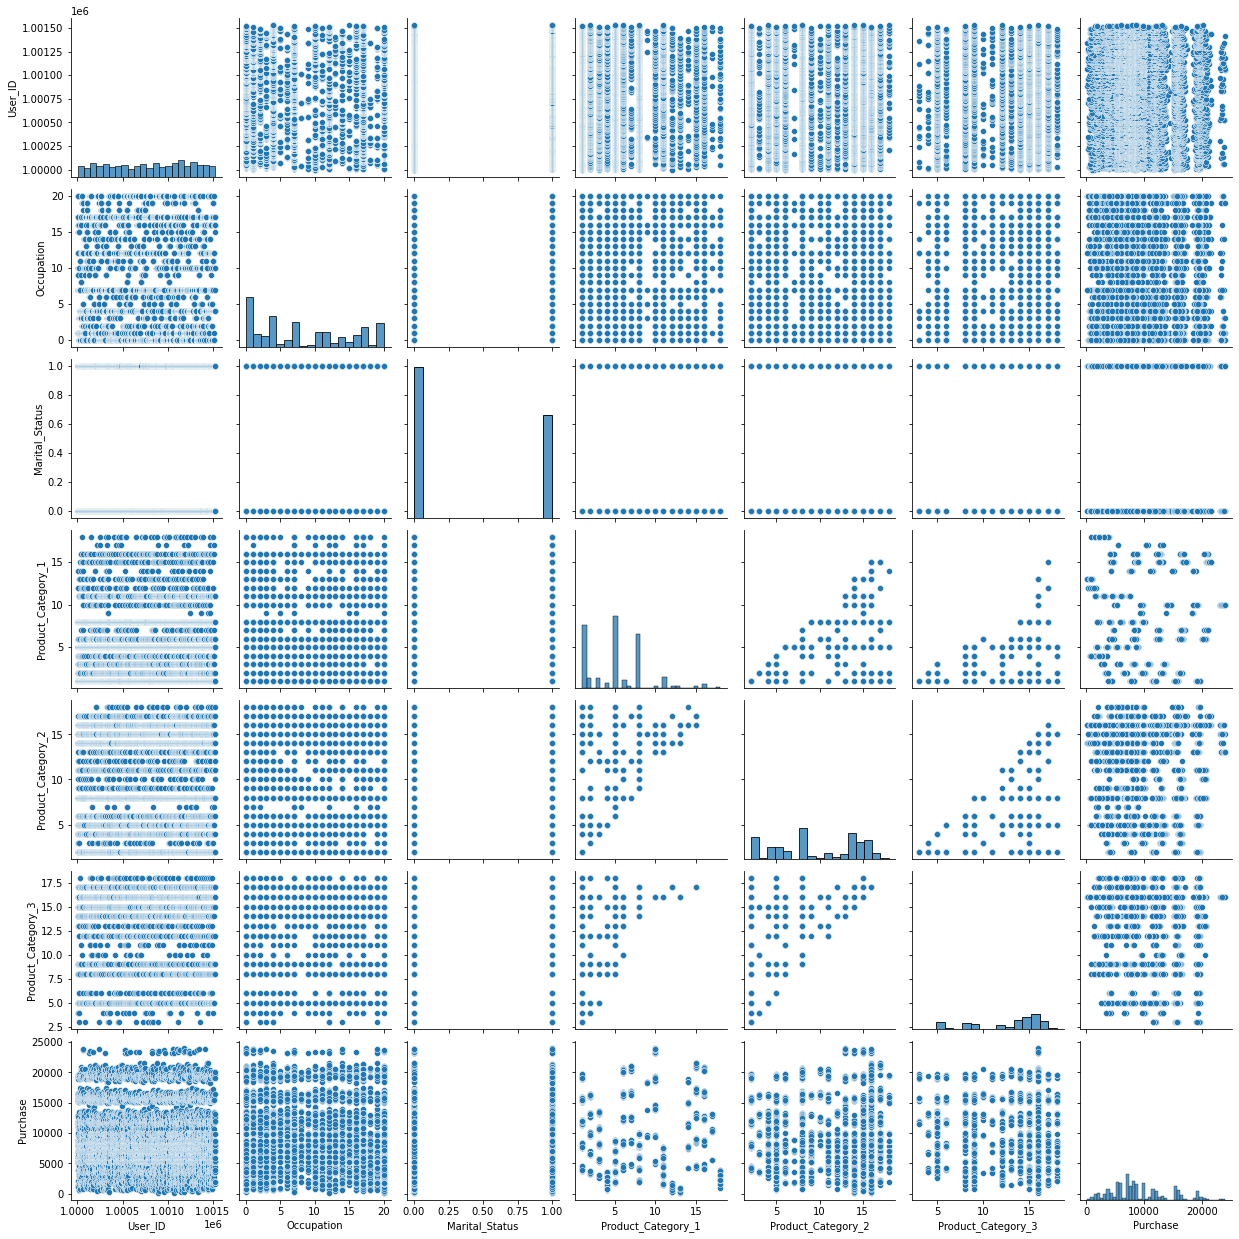

In [147]:
sns.pairplot(df[:10000])

In [148]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:>

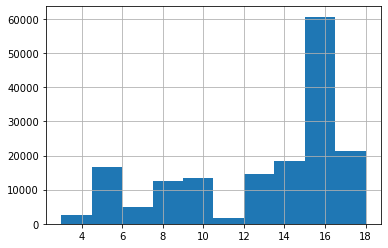

In [149]:
df['Product_Category_3'].hist()

  0%|          | 0/6017 [02:46<?, ?it/s]


<AxesSubplot:>

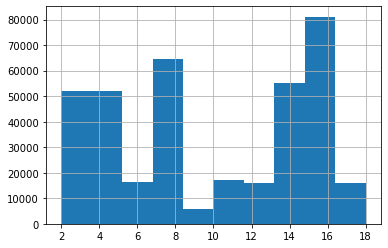

In [150]:
df['Product_Category_2'].hist()

<AxesSubplot:>

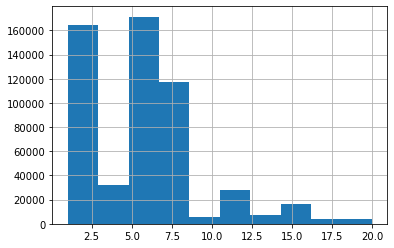

In [151]:
df['Product_Category_1'].hist()

<AxesSubplot:>

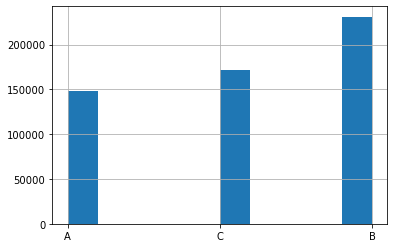

In [152]:
df['City_Category'].hist()

In [153]:
m = df['Product_Category_2'].mean()
df_with_mean = df.copy(deep=True)

df_with_mean['Product_Category_2'] = df['Product_Category_2'].fillna(m)

m = df['Product_Category_3'].mean()

df_with_mean['Product_Category_3'] = df['Product_Category_3'].fillna(m)

In [154]:
df_with_mean.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [155]:
df = df[df['Product_Category_2'].notnull()]
df = df[df['Product_Category_3'].notnull()]
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [156]:
print(df.shape[0])
print(df_with_mean.shape[0])

166821
550068


In [157]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [158]:
df_dummies = pd.get_dummies(df, columns=['City_Category']) 
df_dummies = pd.get_dummies(df_dummies, columns=['Gender']) 
df_dummies = pd.get_dummies(df_dummies, columns=['Age']) 
df_dummies = pd.get_dummies(df_dummies, columns=['Stay_In_Current_City_Years']) 


In [159]:
df_dummies_mean = pd.get_dummies(df_with_mean, columns=['City_Category']) 
df_dummies_mean = pd.get_dummies(df_dummies_mean, columns=['Gender']) 
df_dummies_mean = pd.get_dummies(df_dummies_mean, columns=['Age']) 
df_dummies_mean = pd.get_dummies(df_dummies_mean, columns=['Stay_In_Current_City_Years']) 

In [164]:
df_dummies['Product_ID'] = df_dummies['Product_ID'].map(df_dummies['Product_ID'].value_counts(normalize=True)).astype(float)
df_dummies_mean['Product_ID'] = df_dummies_mean['Product_ID'].map(df_dummies_mean['Product_ID'].value_counts(normalize=True)).astype(float)

In [235]:
df_dummies_mean['User_ID'] = df_dummies_mean['User_ID'].map(df_dummies_mean['User_ID'].value_counts(normalize=True)).astype(float)

No se ven outliers muy diferenciados

<AxesSubplot:>

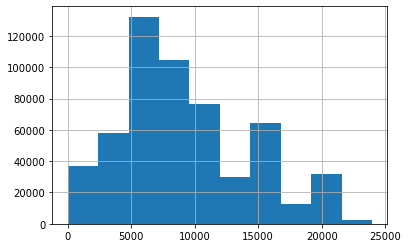

In [236]:
df_dummies_mean['Purchase'].hist()

Clasifico en 3 clases según el costo de la compra

<AxesSubplot:>

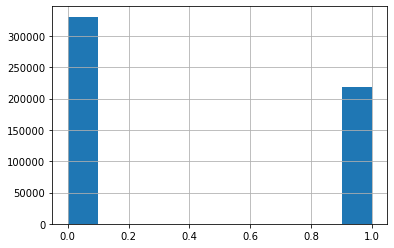

In [237]:
df_classification = df_dummies_mean.copy(deep=True)

limit = 9000

df_classification['amount_category'] = df_classification['Purchase'].map(lambda x: 1 if x > limit else 0)
df_classification['amount_category'].hist()

In [320]:
df_classification['Occupation'] = df_classification['Occupation'].map(df_classification['Occupation'].value_counts(normalize=True)).astype(float)

In [323]:
df_classification['Product_Category_1'] = df_classification['Product_Category_1'].map(df_classification['Product_Category_1'].value_counts(normalize=True)).astype(float)

In [325]:
df_classification['Product_Category_2'] = df_classification['Product_Category_2'].map(df_classification['Product_Category_2'].value_counts(normalize=True)).astype(float)

In [327]:
df_classification['Product_Category_3'] = df_classification['Product_Category_3'].map(df_classification['Product_Category_3'].value_counts(normalize=True)).astype(float)

In [328]:
df_classification.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,...,Age_46-50,Age_51-55,Age_55+,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,amount_category_0,amount_category_1
0,0.000064,0.000413,0.023506,0,0.036746,0.315666,0.696727,8370,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0.000064,0.001056,0.023506,0,0.255201,0.029934,0.033501,15200,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.000064,0.000185,0.023506,0,0.007175,0.315666,0.696727,1422,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.000064,0.000620,0.023506,0,0.007175,0.100184,0.696727,1057,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0.000140,0.000369,0.046123,0,0.207111,0.315666,0.696727,7969,0,0,...,0,0,1,0,0,0,0,1,1,0


In [329]:
df_classification = pd.get_dummies(df_classification, columns=['amount_category']) 

KeyError: "None of [Index(['amount_category'], dtype='object')] are in the [columns]"

In [330]:
y_classification = df_classification[['amount_category_0', 'amount_category_1']]
y_classification

,amount_category_0,amount_category_1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
550063,1,0
550064,1,0
550065,1,0
550066,1,0


In [331]:
X = df_classification[df_classification.columns.drop(['Purchase'])]

In [332]:
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X, 
    y_classification,  
    test_size=0.3,
    random_state=42)

In [333]:
train_classification = torch.Tensor(X_train_classification.to_numpy()).type(torch.FloatTensor)
y_train_classification = torch.Tensor(y_train_classification.to_numpy()).type(torch.FloatTensor)

test_classification = torch.Tensor(X_test_classification.to_numpy()).type(torch.FloatTensor)
y_test_classification = torch.Tensor(y_test_classification.to_numpy()).type(torch.FloatTensor)

In [334]:
class data_set(torch.utils.data.DataLoader):
    def __init__(self,x_param,y_param):
        self.X = x_param                           # set data
        self.Y = y_param                           # set lables

    def __len__(self):
        return self.X.shape[0]                   # return length

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]    # return list of batch data [data, labels]

In [335]:
classification_training_dataset = data_set(train_classification, y_train_classification)
classification_test_dataset = data_set(test_classification, y_test_classification)

In [336]:
# ahora el dataloader
classification_dataloader = {
    'train': torch.utils.data.DataLoader(classification_training_dataset, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(classification_test_dataset, batch_size=64, shuffle=False, pin_memory=True)
}

In [337]:
print(type(classification_dataloader))
print(type(classification_dataloader['train']))
print(len(classification_dataloader['train'].dataset))
print(len(classification_dataloader['test'].dataset))

<class 'dict'>
<class 'torch.utils.data.dataloader.DataLoader'>
385047
165021


In [338]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [339]:
# bloque de convolución para emplear en mi red

def conv_block(c_in, c_out, k=5, p=2, s=1, pk=3, ps=1, pp=1):
    return torch.nn.Sequential(
        torch.nn.Conv1d(c_in, c_out, k, padding=p, stride=s), # conv
        torch.nn.Sigmoid(),                                      # activation
        torch.nn.MaxPool1d(pk, stride=ps, padding=pp)         # pooling
    )

In [340]:
class CNN(torch.nn.Module):
  def __init__(self, n_channels=26, n_outputs=2):
    super().__init__()
    self.conv1 = conv_block(n_channels, 52)
    self.conv1_out = None
    self.conv2 = conv_block(52, 26)
    self.conv2_out = None
    #self.conv3 = conv_block(104, 52)
    #self.conv3_out = None
    self.fc = torch.nn.Linear(26, n_outputs)
    
    
    print('Red creada')
    print('arquitectura:')
    print(self)
    
    # Me fijo en el número de capas
    i=0
    for layer in self.children():
        i=i+1
    print('Número total de capas de CNN (conv+act+polling) + finales : ', i)
    
    # Me fijo en el número de parámetros entrenables
    pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
    print('Número total de parámetros a entrenar: ', pytorch_total_params)

  def n_layers(self):
    i=0
    for layer in self.children():
        i=i+1

    return i

  def n_parameters(self):
    pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
    return pytorch_total_params

  def validar_dim(self, tam):
    print("Validacion de dimensiones")
    x = torch.randn(64, int(tam))
    print("Tamaño entrada: ", x.shape)
    x = self.conv1(x)
    print("Tamaño salida conv1: ", x.shape)
    x = self.conv2(x)
    print("Tamaño salida conv2: ", x.shape)

    x = self.conv3(x)
    print("Tamaño salida conv3: ", x.shape)

    x = x.view(x.shape[0], -1)
    print("Tamaño imagen vectorizada: ", x.shape)
    x = self.fc(x)
    print("Tamaño salida fc (nro clases): ", x.shape)

  def forward(self, x):
    self.conv1_out = self.conv1(x)
    self.conv2_out = self.conv2(self.conv1_out)
    #self.conv3_out = self.conv3(self.conv2_out)
    y = self.conv2_out.view(self.conv2_out.shape[1], -1)
    y = self.fc(y)
    return y
    

In [341]:
def fit(model, dataloader, epochs=15):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    #criterion = torch.nn.SoftMarginLoss()
    epoch_t_loss = []
    epoch_v_loss = []
    epoch_t_acc = []
    epoch_v_acc = []
    for epoch in range(1, epochs+1):

        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            X = X.permute(1, 0)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y.type(torch.FloatTensor))
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())            
            acc = (torch.torch.argmax(y, axis=1) == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            #bar.set_description(f"acc {np.mean(train_acc):.5f}")     
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        epoch_t_loss.append(np.mean(train_loss))
        epoch_t_acc.append(np.mean(train_acc))
        
        
    plt.figure()
    plt.plot(epoch_t_loss, 'r')
    plt.title('loss')
    plt.legend(['train loss'])
    plt.grid()

    plt.figure()
    plt.plot(epoch_t_acc, 'r')
    plt.title('acc')
    plt.legend(['train acc'])
    plt.grid()
    plt.show()

In [253]:
def test_acc(model, dataloader):
    model.to(device)
    train_acc = []

    bar = tqdm(dataloader['test'])
    for batch in bar:
        X, y = batch
        X = X.permute(1, 0)
        X, y = X.to(device), y.to(device)
        y_hat = model(X)
        acc = (torch.torch.argmax(y, axis=1) == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
        train_acc.append(acc)
        #bar.set_description(f"acc {np.mean(train_acc):.5f}")
        
    v_acc  = np.mean(train_acc)

    print(f"Test accuracy {np.mean(v_acc):.5f}")
    plt.figure()
    plt.plot(train_acc, 'r')


    return v_acc

In [342]:
model = CNN()

Red creada
arquitectura:
CNN(
  (conv1): Sequential(
    (0): Conv1d(26, 52, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): Sigmoid()
    (2): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv1d(52, 26, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): Sigmoid()
    (2): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=26, out_features=2, bias=True)
)
Número total de capas de CNN (conv+act+polling) + finales :  3
Número total de parámetros a entrenar:  13652


  2%|▏         | 109/6017 [00:00<00:11, 517.21it/s]

Epoch 1/100 loss 0.54183 acc 0.70451


  2%|▏         | 99/6017 [00:00<00:12, 473.44it/s]

Epoch 2/100 loss 0.53889 acc 0.70444


  1%|          | 54/6017 [00:00<00:11, 532.60it/s]

Epoch 3/100 loss 0.53701 acc 0.70523


  2%|▏         | 108/6017 [00:00<00:11, 527.79it/s]

Epoch 4/100 loss 0.53504 acc 0.70578


  1%|          | 52/6017 [00:00<00:11, 510.81it/s]

Epoch 5/100 loss 0.53351 acc 0.70616


  1%|          | 54/6017 [00:00<00:11, 539.16it/s]

Epoch 6/100 loss 0.53279 acc 0.70618


  2%|▏         | 108/6017 [00:00<00:11, 517.64it/s]

Epoch 7/100 loss 0.53187 acc 0.70617


  2%|▏         | 107/6017 [00:00<00:11, 509.20it/s]

Epoch 8/100 loss 0.53004 acc 0.70804


  2%|▏         | 104/6017 [00:00<00:11, 505.57it/s]

Epoch 9/100 loss 0.52958 acc 0.70866


  1%|          | 50/6017 [00:00<00:12, 492.95it/s]

Epoch 10/100 loss 0.52822 acc 0.70868


  1%|          | 45/6017 [00:00<00:13, 444.85it/s]

Epoch 11/100 loss 0.52830 acc 0.70829


  2%|▏         | 108/6017 [00:00<00:11, 506.09it/s]

Epoch 12/100 loss 0.52715 acc 0.70937


  1%|          | 75/6017 [00:00<00:15, 380.99it/s]

Epoch 13/100 loss 0.52714 acc 0.70914


  2%|▏         | 107/6017 [00:00<00:11, 503.71it/s]

Epoch 14/100 loss 0.52641 acc 0.70964


  2%|▏         | 111/6017 [00:00<00:11, 530.56it/s]

Epoch 15/100 loss 0.52731 acc 0.70940


  1%|          | 51/6017 [00:00<00:11, 507.46it/s]

Epoch 16/100 loss 0.52663 acc 0.70980


  1%|          | 47/6017 [00:00<00:12, 465.99it/s]

Epoch 17/100 loss 0.52591 acc 0.70949


  1%|          | 50/6017 [00:00<00:12, 493.83it/s]

Epoch 18/100 loss 0.52572 acc 0.70969


  1%|          | 35/6017 [00:00<00:17, 344.34it/s]

Epoch 19/100 loss 0.52485 acc 0.70990


  1%|          | 46/6017 [00:00<00:13, 456.22it/s]

Epoch 20/100 loss 0.52464 acc 0.71056


  2%|▏         | 107/6017 [00:00<00:11, 503.00it/s]

Epoch 21/100 loss 0.52532 acc 0.71091


  2%|▏         | 94/6017 [00:00<00:13, 433.50it/s]

Epoch 22/100 loss 0.52412 acc 0.71160


  2%|▏         | 103/6017 [00:00<00:11, 511.37it/s]

Epoch 23/100 loss 0.52466 acc 0.71079


  1%|          | 50/6017 [00:00<00:12, 493.96it/s]

Epoch 24/100 loss 0.52484 acc 0.71035


  1%|          | 51/6017 [00:00<00:11, 505.73it/s]

Epoch 25/100 loss 0.52447 acc 0.71032


  1%|          | 53/6017 [00:00<00:11, 528.20it/s]

Epoch 26/100 loss 0.52416 acc 0.71131


  1%|          | 46/6017 [00:00<00:13, 452.34it/s]

Epoch 27/100 loss 0.52457 acc 0.70971


  1%|          | 52/6017 [00:00<00:11, 515.04it/s]

Epoch 28/100 loss 0.52350 acc 0.71134


  1%|          | 53/6017 [00:00<00:11, 525.31it/s]

Epoch 29/100 loss 0.52286 acc 0.71191


  2%|▏         | 110/6017 [00:00<00:11, 519.09it/s]

Epoch 30/100 loss 0.52302 acc 0.71070


  2%|▏         | 104/6017 [00:00<00:12, 481.36it/s]

Epoch 31/100 loss 0.52379 acc 0.71015


  2%|▏         | 112/6017 [00:00<00:11, 528.01it/s]

Epoch 32/100 loss 0.52259 acc 0.71177


  1%|          | 51/6017 [00:00<00:11, 505.18it/s]

Epoch 33/100 loss 0.52297 acc 0.71131


  2%|▏         | 106/6017 [00:00<00:11, 513.46it/s]

Epoch 34/100 loss 0.52319 acc 0.71068


  2%|▏         | 110/6017 [00:00<00:11, 532.49it/s]

Epoch 35/100 loss 0.52258 acc 0.71209


  2%|▏         | 107/6017 [00:00<00:11, 514.26it/s]

Epoch 36/100 loss 0.52168 acc 0.71284


  1%|          | 48/6017 [00:00<00:12, 472.51it/s]

Epoch 37/100 loss 0.52233 acc 0.71113


  2%|▏         | 106/6017 [00:00<00:11, 511.87it/s]

Epoch 38/100 loss 0.52187 acc 0.71193


  2%|▏         | 113/6017 [00:00<00:10, 547.95it/s]

Epoch 39/100 loss 0.52238 acc 0.71149


  1%|          | 49/6017 [00:00<00:12, 488.31it/s]

Epoch 40/100 loss 0.52190 acc 0.71184


  1%|          | 47/6017 [00:00<00:12, 466.85it/s]

Epoch 41/100 loss 0.52153 acc 0.71195


  1%|          | 53/6017 [00:00<00:11, 520.76it/s]

Epoch 42/100 loss 0.52196 acc 0.71155


  1%|          | 49/6017 [00:00<00:12, 484.43it/s]

Epoch 43/100 loss 0.52112 acc 0.71317


  2%|▏         | 106/6017 [00:00<00:12, 488.04it/s]

Epoch 44/100 loss 0.52156 acc 0.71219


  1%|          | 39/6017 [00:00<00:15, 379.06it/s]

Epoch 45/100 loss 0.52217 acc 0.71246


  1%|▏         | 86/6017 [00:00<00:14, 423.17it/s]

Epoch 46/100 loss 0.52216 acc 0.71121


  1%|          | 72/6017 [00:00<00:17, 335.36it/s]

Epoch 47/100 loss 0.52203 acc 0.71223


  1%|▏         | 90/6017 [00:00<00:13, 431.96it/s]

Epoch 48/100 loss 0.52114 acc 0.71265


  1%|          | 38/6017 [00:00<00:15, 376.90it/s]

Epoch 49/100 loss 0.52164 acc 0.71187


  1%|          | 41/6017 [00:00<00:14, 402.73it/s]

Epoch 50/100 loss 0.52112 acc 0.71244


  1%|          | 53/6017 [00:00<00:11, 527.22it/s]

Epoch 51/100 loss 0.52068 acc 0.71243


  2%|▏         | 110/6017 [00:00<00:11, 534.86it/s]

Epoch 52/100 loss 0.52141 acc 0.71221


  1%|          | 47/6017 [00:00<00:12, 467.03it/s]

Epoch 53/100 loss 0.52097 acc 0.71298


  2%|▏         | 111/6017 [00:00<00:11, 516.43it/s]

Epoch 54/100 loss 0.52088 acc 0.71260


  1%|          | 52/6017 [00:00<00:11, 509.34it/s]

Epoch 55/100 loss 0.52067 acc 0.71312


  2%|▏         | 106/6017 [00:00<00:11, 510.32it/s]

Epoch 56/100 loss 0.52027 acc 0.71349


  2%|▏         | 111/6017 [00:00<00:10, 538.53it/s]

Epoch 57/100 loss 0.52075 acc 0.71325


  2%|▏         | 106/6017 [00:00<00:11, 517.63it/s]

Epoch 58/100 loss 0.52105 acc 0.71230


  2%|▏         | 93/6017 [00:00<00:14, 403.24it/s]

Epoch 59/100 loss 0.52020 acc 0.71326


  1%|          | 49/6017 [00:00<00:12, 481.07it/s]

Epoch 60/100 loss 0.52058 acc 0.71282


  2%|▏         | 115/6017 [00:00<00:10, 558.13it/s]

Epoch 61/100 loss 0.52017 acc 0.71333


  2%|▏         | 110/6017 [00:00<00:11, 524.73it/s]

Epoch 62/100 loss 0.52083 acc 0.71195


  2%|▏         | 109/6017 [00:00<00:11, 523.67it/s]

Epoch 63/100 loss 0.52125 acc 0.71176


  1%|          | 49/6017 [00:00<00:12, 485.24it/s]

Epoch 64/100 loss 0.52052 acc 0.71327


  2%|▏         | 110/6017 [00:00<00:10, 541.66it/s]

Epoch 65/100 loss 0.52039 acc 0.71326


  2%|▏         | 105/6017 [00:00<00:11, 509.62it/s]

Epoch 66/100 loss 0.52029 acc 0.71424


  2%|▏         | 110/6017 [00:00<00:11, 527.96it/s]

Epoch 67/100 loss 0.51964 acc 0.71458


  2%|▏         | 113/6017 [00:00<00:11, 528.05it/s]

Epoch 68/100 loss 0.52014 acc 0.71315


  2%|▏         | 111/6017 [00:00<00:10, 537.62it/s]

Epoch 69/100 loss 0.51939 acc 0.71374


  0%|          | 23/6017 [00:00<00:26, 226.03it/s]

Epoch 70/100 loss 0.51994 acc 0.71315


  1%|          | 51/6017 [00:00<00:11, 500.15it/s]

Epoch 71/100 loss 0.52028 acc 0.71284


  2%|▏         | 92/6017 [00:00<00:13, 433.13it/s]

Epoch 72/100 loss 0.52039 acc 0.71295


  2%|▏         | 102/6017 [00:00<00:11, 504.04it/s]

Epoch 73/100 loss 0.51992 acc 0.71314


  1%|          | 47/6017 [00:00<00:12, 468.17it/s]

Epoch 74/100 loss 0.52022 acc 0.71343


  1%|          | 41/6017 [00:00<00:14, 406.94it/s]

Epoch 75/100 loss 0.51964 acc 0.71356


  1%|          | 45/6017 [00:00<00:13, 443.58it/s]

Epoch 76/100 loss 0.51937 acc 0.71409


  1%|          | 51/6017 [00:00<00:11, 504.31it/s]

Epoch 77/100 loss 0.51941 acc 0.71345


  1%|          | 43/6017 [00:00<00:14, 425.86it/s]

Epoch 78/100 loss 0.51969 acc 0.71354


  1%|          | 49/6017 [00:00<00:12, 480.91it/s]

Epoch 79/100 loss 0.52006 acc 0.71326


  1%|          | 48/6017 [00:00<00:12, 470.25it/s]

Epoch 80/100 loss 0.51976 acc 0.71302


  1%|          | 49/6017 [00:00<00:12, 484.10it/s]

Epoch 81/100 loss 0.52045 acc 0.71306


  1%|          | 69/6017 [00:00<00:08, 681.76it/s]

Epoch 82/100 loss 0.51972 acc 0.71364


  1%|          | 55/6017 [00:00<00:10, 542.18it/s]

Epoch 83/100 loss 0.51954 acc 0.71396


  1%|          | 33/6017 [00:00<00:18, 326.11it/s]

Epoch 84/100 loss 0.51954 acc 0.71345


  1%|          | 46/6017 [00:00<00:13, 456.30it/s]

Epoch 85/100 loss 0.51900 acc 0.71428


  1%|▏         | 84/6017 [00:00<00:15, 379.78it/s]

Epoch 86/100 loss 0.51992 acc 0.71428


  1%|          | 48/6017 [00:00<00:12, 474.16it/s]

Epoch 87/100 loss 0.51966 acc 0.71383


  1%|          | 49/6017 [00:00<00:12, 484.02it/s]

Epoch 88/100 loss 0.51940 acc 0.71402


  2%|▏         | 100/6017 [00:00<00:12, 473.62it/s]

Epoch 89/100 loss 0.51972 acc 0.71353


  1%|          | 54/6017 [00:00<00:11, 537.65it/s]

Epoch 90/100 loss 0.51966 acc 0.71327


  1%|          | 49/6017 [00:00<00:12, 480.43it/s]

Epoch 91/100 loss 0.51913 acc 0.71416


  2%|▏         | 109/6017 [00:00<00:11, 533.25it/s]

Epoch 92/100 loss 0.51919 acc 0.71377


  2%|▏         | 103/6017 [00:00<00:12, 492.83it/s]

Epoch 93/100 loss 0.51963 acc 0.71323


  2%|▏         | 104/6017 [00:00<00:11, 495.87it/s]

Epoch 94/100 loss 0.51991 acc 0.71338


  2%|▏         | 104/6017 [00:00<00:11, 507.76it/s]

Epoch 95/100 loss 0.51996 acc 0.71288


  2%|▏         | 107/6017 [00:00<00:11, 511.59it/s]

Epoch 96/100 loss 0.51944 acc 0.71400


  2%|▏         | 107/6017 [00:00<00:11, 528.41it/s]

Epoch 97/100 loss 0.51951 acc 0.71374


  1%|          | 54/6017 [00:00<00:11, 532.22it/s]

Epoch 98/100 loss 0.51954 acc 0.71333


  2%|▏         | 113/6017 [00:00<00:11, 530.25it/s]

Epoch 99/100 loss 0.51839 acc 0.71492


100%|██████████| 6017/6017 [00:10<00:00, 562.36it/s]


Epoch 100/100 loss 0.51955 acc 0.71346


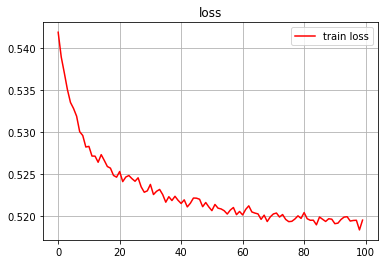

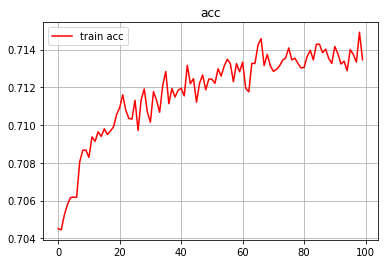

In [346]:
fit(model, classification_dataloader, epochs=100)

100%|██████████| 2579/2579 [00:02<00:00, 1279.21it/s]


Test accuracy 0.71258
accuracy 0.71258


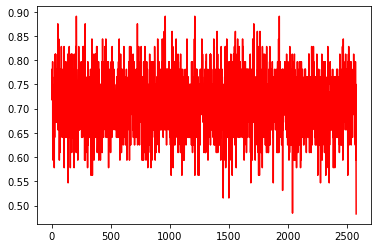

In [347]:
accuracy = test_acc(model, classification_dataloader)
print(f"accuracy {accuracy:.5f}")

In [348]:
# Arquitectura
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=26, out_features=52, bias=True)
    self.non_linear_1 = torch.nn.Tanh()
    """
    self.linear_2 = torch.nn.Linear(in_features = 52, out_features=104, bias=True)
    self.non_linear_2 = torch.nn.Tanh()
    self.linear_3 = torch.nn.Linear(in_features = 104, out_features=208, bias=True)
    self.non_linear_3 = torch.nn.Tanh()
    self.linear_4 = torch.nn.Linear(in_features = 208, out_features=104, bias=True)
    self.non_linear_4 = torch.nn.Tanh()
    self.linear_5 = torch.nn.Linear(in_features = 104, out_features=52, bias=True)
    self.non_linear_5 = torch.nn.Tanh()
    """
    self.linear_6 = torch.nn.Linear(in_features = 52, out_features=26, bias=True)
    self.non_linear_6 = torch.nn.Tanh()
    self.linear_7 = torch.nn.Linear(in_features = 26, out_features=13, bias=True)
    self.non_linear_7 = torch.nn.Tanh()
    self.output = torch.nn.Linear(in_features = 13, out_features= 2, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.non_linear_1(x)
    """
    x = self.linear_2(x)
    x = self.non_linear_2(x)

    x = self.linear_3(x)
    x = self.non_linear_3(x)
    

    x = self.linear_4(x)
    x = self.non_linear_4(x)

    x = self.linear_5(x)
    x = self.non_linear_5(x)
    """
    x = self.linear_6(x)
    x = self.non_linear_6(x)

    x = self.linear_7(x)
    x = self.non_linear_7(x)
    
    x = self.output(x)
    return x

In [350]:
n_train = X_train_classification.shape[0]
n_valid = X_test_classification.shape[0]
# Instanciamos la red
nnet = NNet()
# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)
# Función de pérdida y optimizador
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

# Algoritmo Mini-batch

# cantidad de epochs
epochs = 30

train_loss_by_epoch=[]
valid_loss_by_epoch=[]
train_acc_by_epoch=[]
valid_acc_by_epoch=[]

# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_acc = []
  epoch_y = []
  train_diff = 0
   
  for i,data in enumerate(classification_dataloader['train']):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float()

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(y_batch_hat, y_batch)
    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    acc = (torch.torch.argmax(y_batch, axis=1) == torch.argmax(y_batch_hat, axis=1)).sum().item() / len(y_batch)
    epoch_acc.append(acc)
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  train_acc_by_epoch.append(np.mean(epoch_acc))
  

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []
  valid_epoch_acc = []

  for i,data in enumerate(classification_dataloader['test']):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float()

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = nnet_output # torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    acc = (torch.torch.argmax(y_batch, axis=1) == torch.argmax(y_batch_hat, axis=1)).sum().item() / len(y_batch)
    valid_epoch_acc.append(acc)
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_acc_by_epoch.append(np.mean(valid_epoch_acc))
  

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  #print(" Epoch {epoch} | " \
  #      f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | ")
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid Diff: {np.mean(epoch_acc):.3f} / {np.mean(valid_epoch_acc):.3f}")


# Grafica loss por epoch
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")


fig, ax1= plt.subplots(1,1)
ax1.plot(train_acc_by_epoch, label="Train acc")
ax1.plot(valid_acc_by_epoch, label="Validation acc")
ax1.legend()
ax1.set_title("Diff by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("MSE")

 Epoch 0 | Train/Valid loss: 0.005 / 0.000 | Train/Valid Diff: 1.000 / 1.000
 Epoch 1 | Train/Valid loss: 0.005 / 0.000 | Train/Valid Diff: 1.000 / 1.000
 Epoch 2 | Train/Valid loss: 0.005 / 0.000 | Train/Valid Diff: 1.000 / 1.000


KeyboardInterrupt: 

In [351]:
torch.save(nnet.state_dict(), 'nnet/nnet_classification_8_capas.pth')
torch.save(model.state_dict(), 'nnet/cnn_classification_4_bloques.pth')

Vemos el comportamiento de ambas redes

In [352]:
i = 0

for index in range(2000):
    t = torch.tensor(X_test_classification.iloc[index].values).float().unsqueeze(0)
    y_hat = model.forward(t.permute(1, 0))
    i = i + torch.argmax(y_hat).item()
    #print("Tiene razon la prediccion?")
    #print((y_test_classification[index][torch.argmax(y_hat)] == 1).item())

print(i)

800


In [353]:
for index in [50, 100, 150, 200]:
    print("CNN")
    t = torch.tensor(X_test_classification.iloc[index].values).float().unsqueeze(0)
    y_hat = model.forward(t.permute(1, 0))
    print("Valor predicho")
    print(y_hat)
    print("Tiene razon la prediccion?")
    print((y_test_classification[index][torch.argmax(y_hat)] == 1).item())

    print("NNET")
    t = torch.tensor(X_test_classification.iloc[index].values).float().unsqueeze(0)
    y_hat = nnet.forward(t)
    print("Valor predicho")
    print(y_hat)
    print("Tiene razon la prediccion?")
    print((y_test_classification[index][torch.argmax(y_hat)] == 1).item())

CNN
Valor predicho
tensor([[-7.8022,  7.9887]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[-19.9772,  19.2111]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
CNN
Valor predicho
tensor([[ 6.3350, -6.4474]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[ 19.5110, -20.4266]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
CNN
Valor predicho
tensor([[ 6.3504, -6.4477]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[ 19.5112, -20.4267]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
CNN
Valor predicho
tensor([[ 6.2566, -6.3744]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
NNET
Valor predicho
tensor([[ 19.5105, -20.4260]], grad_fn=<AddmmBackward0>)
Tiene razon la prediccion?
True
